Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [62]:
import sys, os
sys.path.append('../')

# Third-party packages
import h5py
import matplotlib.pyplot as pl
import matplotlib.mlab as mlab
%matplotlib inline

import numpy as np
from sklearn.linear_model import LogisticRegression

# this package
from astronn.data import fetch_notMNIST

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts in a series of 28 by 28 images. The labels simply identify the letter presented in each image (and are limited to A-J, so, 10 classes). The training set and test set have about 500000 and 19000 image-label pairs, respectively. Even with these sizes, it should be possible to train models quickly on any machine.

_Note: This could take some time! You are about to download a ~1.7 GB file. Go get some coffee._

In [4]:
cache_file = fetch_notMNIST()

Data file already exists and is verified.


## First, we'll print some information about the data:

In [3]:
with h5py.File(cache_file, 'r') as f:
    for name,group in f.items():
        print("{}:".format(name))
        
        for k,v in group.items():
            print("\t {} {}".format(k,v.shape))

test:
	 images (18724, 28, 28)
	 labels (18724,)
train:
	 images (500000, 28, 28)
	 labels (500000,)
validate:
	 images (18000, 28, 28)
	 labels (18000,)


---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font.  

Plot a 3 by 3 grid of sample images from the test set and set the title of each panel to the character name (use the labels).

_Hint: use `matplotlib.pyplot.imshow()`_

---

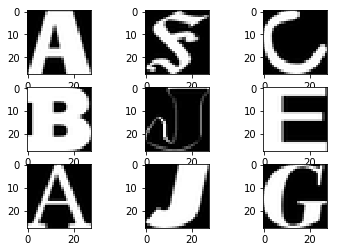

In [19]:
pl.figure()
pl.gray()
with h5py.File(cache_file, 'r') as f:
    for ii in range(9):
        pl.subplot(3,3,ii+1)
        pl.imshow(f['train']['images'][ii], origin='upper')
        

---
Problem 2
---------

Now display the mean of all images from each class individually and again set the title of each panel to the corresponding character name.

---

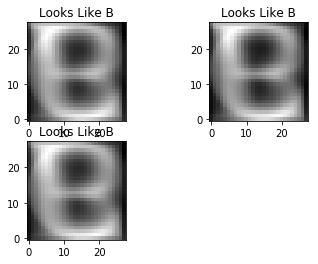

In [28]:
pl.figure()
with h5py.File(cache_file, 'r') as f:
    pl.subplot(2,2,1)
    pl.imshow(np.mean(f['train']['images'], axis=0))
    pl.title('Looks Like B')
    
    pl.subplot(2,2,2)
    pl.imshow(np.mean(f['test']['images'], axis=0))
    pl.title('Looks Like B')
    
    pl.subplot(2,2,3)
    pl.imshow(np.mean(f['validate']['images'], axis=0))
    pl.title('Looks Like B')

---
Problem 3
---------

Next, we'll randomize the data. It's important to randomize both the train and test data sets. Verify that the data is still labeled correctly after randomization.

---

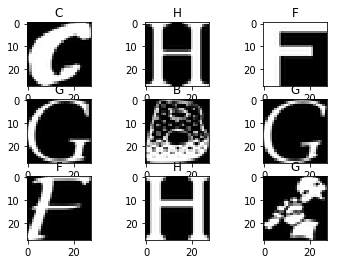

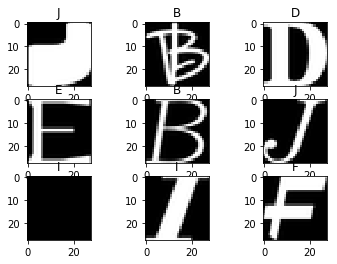

In [43]:
import random

def randomize(data, labels):
    # must use list as range returns an iterator in Python3
    indices = list(range(len(data)))
    random.shuffle(indices)
    return data[indices], labels[indices]

with h5py.File(cache_file, 'r') as f:
    train_dataset, train_labels = randomize(f['train']['images'][:], f['train']['labels'][:])
    test_dataset, test_labels = randomize(f['test']['images'][:], f['test']['labels'][:])
 
pl.figure(3)
for ii in range(9):
    pl.subplot(3,3,ii+1)
    pl.imshow(train_dataset[ii], origin='upper')
    pl.title(letters[int(train_labels[ii])])

pl.figure(4)
for ii in range(9):
    pl.subplot(3,3,ii+1)
    pl.imshow(test_dataset[ii], origin='upper')
    pl.title(letters[int(test_labels[ii])])


---
Problem 4
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

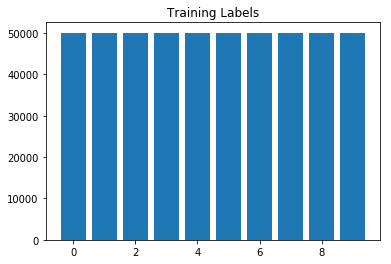

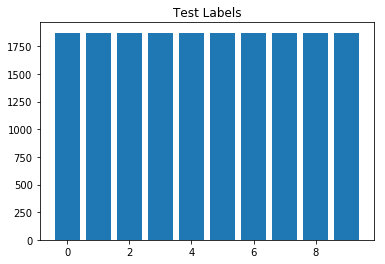

In [55]:
pl.figure()
pl.hist(train_labels, bins=list(range(11)), align='left', rwidth=0.8)
pl.title('Training Labels')

pl.figure()
pl.hist(test_labels, bins=list(range(11)), align='left', rwidth=0.8)
pl.title('Test Labels')

---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples (identical images), including training data that's also contained in the validation and test set. Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.

- How much overlap is there between training, validation and test samples?
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [65]:
dd = {}        
for alphai in range(10):
    print(alphai)
    indices = mlab.find(train_labels == alphai)
    dd[alphai] = np.zeros((len(indices), len(indices)))
    for rr in range(len(indices)):
        for cc in range(rr, len(indices)):
            dd[alphai] = np.sum(np.abs(train_dataset[rr] - train_dataset[cc]))

0


KeyboardInterrupt: 

---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---